[Reference](https://medium.com/@francescofranco_39234/the-softmax-activation-function-137c321461ca)

<ipython-input-4-bab0da064f30>:26: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  Targets_testing = categorical_targets[:training_split].astype(np.integer)


Feature shape: (2,)


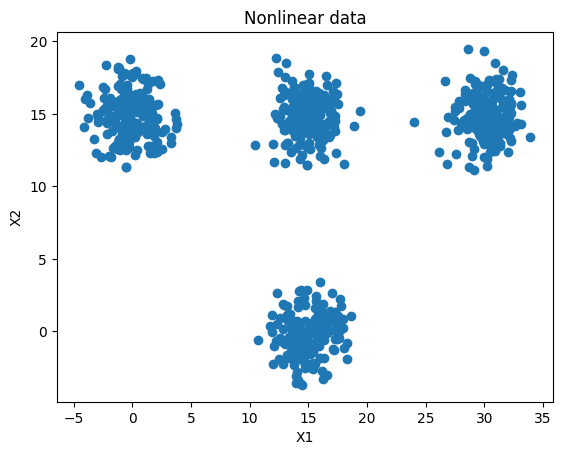

Epoch 1/30
120/120 [==============================] - 2s 4ms/step - loss: 9.2802 - accuracy: 0.0150 - val_loss: 1.7562 - val_accuracy: 0.2133
Epoch 2/30
120/120 [==============================] - 0s 2ms/step - loss: 0.5336 - accuracy: 0.8483 - val_loss: 0.1689 - val_accuracy: 1.0000
Epoch 3/30
120/120 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9967 - val_loss: 0.0875 - val_accuracy: 1.0000
Epoch 4/30
120/120 [==============================] - 0s 2ms/step - loss: 0.0812 - accuracy: 0.9967 - val_loss: 0.0607 - val_accuracy: 1.0000
Epoch 5/30
120/120 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9967 - val_loss: 0.0469 - val_accuracy: 1.0000
Epoch 6/30
120/120 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9967 - val_loss: 0.0391 - val_accuracy: 1.0000
Epoch 7/30
120/120 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9967 - val_loss: 0.0323 - val_accuracy: 1.0000
Epoch 

In [4]:
'''
  Keras model to demonstrate Softmax activation function.
'''
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

# Configuration options
num_samples_total = 1000
training_split = 250
cluster_centers = [(15,0), (15,15), (0,15), (30,15)]
num_classes = len(cluster_centers)
loss_function_used = 'categorical_crossentropy'

# Generate data
X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 1.5)
categorical_targets = to_categorical(targets)
X_training = X[training_split:, :]
X_testing = X[:training_split, :]
Targets_training = categorical_targets[training_split:]
Targets_testing = categorical_targets[:training_split].astype(np.integer)

# Set shape based on data
feature_vector_length = len(X_training[0])
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Generate scatter plot for training data
plt.scatter(X_training[:,0], X_training[:,1])
plt.title('Nonlinear data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

# Create the model
model = Sequential()
model.add(Dense(12, input_shape=input_shape, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss=loss_function_used, optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(X_training, Targets_training, epochs=30, batch_size=5, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_testing, Targets_testing, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')